<a href="https://colab.research.google.com/github/sayashraaj/BTP/blob/main/Gurobi_trial_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TO DO**



1. Big M using indicator variable DONE
2. Model is infeasible when t[origin] is used DONE
3. Convert DB to 14 Day DB
4. Build Cost from DB, not dummy
5. Change t[dest] to ? for multiple dests
6. Test on bigger sample network DONE
7. Use variability in sample network

### Pre Processing

In [3]:
# Importing the DataFrame

import pandas as pd
url = "https://raw.githubusercontent.com/sayashraaj/Dump/main/TrainScheduleDB.csv"
df = pd.read_csv(url, encoding='cp1252')

df.head(60)

,TrainId,TrainName,StationId,StationName,ScheduledArrival,ScheduledDeparture,Distance,Day
0,22981,KOTA - SRIGANGANAGAR SF EXPRESS,KOTA,KOTA JUNCTION,Source,17:20,0.0,1
1,22981,KOTA - SRIGANGANAGAR SF EXPRESS,KPTN,KESHORAI PATAN,17:35,17:37,13.3,1
2,22981,KOTA - SRIGANGANAGAR SF EXPRESS,LKE,LAKHERI,18:07,18:09,60.6,1
3,22981,KOTA - SRIGANGANAGAR SF EXPRESS,IDG,INDARGARH SUMERGANJ MANDI,18:18,18:20,71.4,1
4,22981,KOTA - SRIGANGANAGAR SF EXPRESS,SWM,SAWAI MADHOPUR JUNCTION,19:00,19:15,107.9,1
5,22981,KOTA - SRIGANGANAGAR SF EXPRESS,CKB,CHAUTH KA BARWARA,19:45,19:47,129.9,1
6,22981,KOTA - SRIGANGANAGAR SF EXPRESS,ISA,ISARDA,20:00,20:02,147.8,1
7,22981,KOTA - SRIGANGANAGAR SF EXPRESS,BNLW,BANASTHALI NIWAI,20:21,20:22,173.7,1
8,22981,KOTA - SRIGANGANAGAR SF EXPRESS,DPA,DURGAPURA,21:13,21:16,232.3,1
9,22981,KOTA - SRIGANGANAGAR SF EXPRESS,JP,JAIPUR JUNCTION,21:35,21:45,239.7,1


In [4]:
stations_list = ["WL", "TPJ", "MAS", "SBC", "NDLS"]
df_filtered = df[df["StationId"].isin(stations_list)]
df_filtered.head(5)

,TrainId,TrainName,StationId,StationName,ScheduledArrival,ScheduledDeparture,Distance,Day
46716,51901,AGRA CANTT. - OLD DELHI PASSENGER,NDLS,NEW DELHI,15:35,15:40,195.0,1
46721,51902,OLD DELHI - AGRA CANT. PASSENGER,NDLS,NEW DELHI,07:15,07:17,3.3,1
49478,1707,JABALPUR - ATARI FARE SPECIAL,NDLS,NEW DELHI,00:20,00:50,910.7,2
49491,1708,ATARI - JABALPUR FARE SPECIAL,NDLS,NEW DELHI,01:30,02:00,473.4,2
49684,2172,JAMMU TAWI - MUMBAI CST AC SF SPECIAL,NDLS,NEW DELHI,16:40,17:00,577.1,1


In [5]:
# Filtering df to have trains which stop at at least 1 station in the list

TrainId_dict = {}

for row in df_filtered.itertuples():
  TrainId_dict[row.TrainId] = []

TrainId_list = list(TrainId_dict.keys())
print("TrainId_List: ",TrainId_list)

df_filtered_1 = df[df["TrainId"].isin(TrainId_list)]
df_filtered_1.head(50)

TrainId_List:  ['51901', '51902', '1707', '1708', '2172', '2193', '2194', '2779', '4012', '4905', '4906', '6001', '6002', '6005', '6006', '6007', '6008', '6011', '6015', '6016', '6025', '6026', '6027', '6028', '6037', '6048', '6051', '6052', '6057', '6058', '6063', '6229', '6230', '6539', '6540', '6569', '6570', '6863', '6864', '7075', '7076', '7147', '7148', '7257', '7607', '7608', '8500', '9005', '9006', '11013', '11014', '11019', '11020', '11027', '11028', '11041', '11042', '11043', '11044', '11057', '11058', '11065', '11066', '11073', '11074', '11077', '11078', '11301', '11302', '11303', '11304', '11449', '11450', '11901', '11902', '12001', '12002', '12003', '12004', '12005', '12006', '12007', '12008', '12011', '12012', '12013', '12014', '12015', '12016', '12017', '12018', '12027', '12028', '12029', '12030', '12031', '12032', '12033', '12034', '12037', '12038', '12039', '12040', '12043', '12044', '12045', '12046', '12047', '12048', '12055', '12056', '12057', '12058', '12077', '1207

,TrainId,TrainName,StationId,StationName,ScheduledArrival,ScheduledDeparture,Distance,Day
46688,51901,AGRA CANTT. - OLD DELHI PASSENGER,AGC,AGRA CANTT.,Source,09:00,0.0,1
46689,51901,AGRA CANTT. - OLD DELHI PASSENGER,RKM,RAJA KI MANDI,09:09,09:10,4.0,1
46690,51901,AGRA CANTT. - OLD DELHI PASSENGER,BFP,BILOCHPURA AGRA,09:15,09:16,5.6,1
46691,51901,AGRA CANTT. - OLD DELHI PASSENGER,RNKA,RUNKUTA,09:25,09:26,14.6,1
46692,51901,AGRA CANTT. - OLD DELHI PASSENGER,KXM,KITHAM,09:36,09:37,23.6,1
46693,51901,AGRA CANTT. - OLD DELHI PASSENGER,FHT,FARAH TOWN,09:46,09:47,32.8,1
46694,51901,AGRA CANTT. - OLD DELHI PASSENGER,FAR,FARAH,09:52,09:53,35.1,1
46695,51901,AGRA CANTT. - OLD DELHI PASSENGER,BAD,BAAD,10:02,10:03,43.8,1
46696,51901,AGRA CANTT. - OLD DELHI PASSENGER,MTJ,MATHURA JUNCTION,10:38,10:46,53.8,1
46697,51901,AGRA CANTT. - OLD DELHI PASSENGER,BTSR,BHUTESHWAR,10:53,10:54,56.5,1


In [6]:
# Filtering dictionary to have trains which stop at at least 1 station in the list

for row in df_filtered_1.itertuples():
    if row.StationId in stations_list:
        TrainId_dict[row.TrainId].append(row.StationId)
#         if row.TrainId=="2193":
#             print(row.TrainId, row.ScheduledArrival, row.StationId)
# print(TrainId_dict["2193"])

print(len(TrainId_dict))

TrainId_dict_temp = {}
for TrainId in TrainId_dict:
    if len(TrainId_dict[TrainId])>1:
        TrainId_dict_temp[TrainId] = TrainId_dict[TrainId]
TrainId_dict = TrainId_dict_temp
print(len(TrainId_dict))

980
87


In [7]:
# Visual sanity check
for TrainId in TrainId_dict:
    print(TrainId, TrainId_dict[TrainId])

2193 ['TPJ', 'WL']
2194 ['WL', 'TPJ']
12007 ['MAS', 'SBC']
12008 ['SBC', 'MAS']
12027 ['MAS', 'SBC']
12028 ['SBC', 'MAS']
12295 ['SBC', 'MAS', 'WL']
12296 ['WL', 'MAS', 'SBC']
12433 ['MAS', 'WL']
12434 ['WL', 'MAS']
12511 ['WL', 'MAS']
12512 ['MAS', 'WL']
12521 ['WL', 'MAS']
12522 ['MAS', 'WL']
12577 ['WL', 'MAS', 'SBC']
12578 ['SBC', 'MAS', 'WL']
12607 ['MAS', 'SBC']
12608 ['SBC', 'MAS']
12609 ['MAS', 'SBC']
12610 ['SBC', 'MAS']
12615 ['MAS', 'WL', 'NDLS']
12616 ['NDLS', 'WL']
12621 ['MAS', 'WL', 'NDLS']
12622 ['NDLS', 'WL', 'MAS']
12625 ['WL', 'NDLS']
12626 ['NDLS', 'WL']
12627 ['SBC', 'NDLS']
12628 ['NDLS', 'SBC']
12639 ['MAS', 'SBC']
12640 ['SBC', 'MAS']
12655 ['WL', 'MAS']
12656 ['MAS', 'WL']
12657 ['MAS', 'SBC']
12658 ['SBC', 'MAS']
12669 ['MAS', 'WL']
12670 ['WL', 'MAS']
12687 ['MAS', 'WL']
12687-Slip ['MAS', 'WL']
12688 ['WL', 'MAS']
12689 ['MAS', 'TPJ']
12690 ['TPJ', 'MAS']
12691 ['MAS', 'SBC']
12692 ['SBC', 'MAS']
12759 ['MAS', 'WL']
12760 ['WL', 'MAS']
12851 ['WL', 'MAS']
12

In [8]:
# Filtering df again to have trains which stop at at least 2 stations in the list

TrainId_list = list(TrainId_dict.keys())
print("TrainId_List: ",TrainId_list)

df_filtered_1 = df[df["TrainId"].isin(TrainId_list)]
df_filtered_1.head(50)

TrainId_List:  ['2193', '2194', '12007', '12008', '12027', '12028', '12295', '12296', '12433', '12434', '12511', '12512', '12521', '12522', '12577', '12578', '12607', '12608', '12609', '12610', '12615', '12616', '12621', '12622', '12625', '12626', '12627', '12628', '12639', '12640', '12655', '12656', '12657', '12658', '12669', '12670', '12687', '12687-Slip', '12688', '12689', '12690', '12691', '12692', '12759', '12760', '12851', '12852', '12967', '12968', '12969', '12970', '15119', '15120', '16021', '16022', '16031', '16032', '16093', '16094', '16231', '16232', '16317', '16318', '16318-Slip', '16687', '16688', '16688-Slip', '16793', '16794', '22351', '22352', '22403', '22404', '22415', '22416', '22625', '22626', '22631', '22632', '22645', '22646', '22647', '22648', '22681', '22682', '16787', '22688']


,TrainId,TrainName,StationId,StationName,ScheduledArrival,ScheduledDeparture,Distance,Day
49743,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,TEN,TIRUNELVELI JUNCTION,Source,17:45,0.0,1
49744,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,CVP,KOVILPATTI,19:08,19:10,65.2,1
49745,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,SRT,SATUR,19:33,19:35,86.8,1
49746,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,VPT,VIRUDUNAGAR JUNCTION,20:08,20:10,113.7,1
49747,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,MDU,MADURAI JUNCTION,20:55,21:00,157.1,1
49748,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,DG,DINDIGUL JUNCTION,22:00,22:05,219.4,1
49749,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,TPJ,TIRUCHCHIRAPPALLI JUNCTION,00:05,00:10,313.8,2
49750,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,KRR,KARUR JUNCTION,01:30,01:32,390.0,2
49751,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,NMKL,NAMAKKAL,02:13,02:15,423.9,2
49752,2193,TIRUNELVELI - JABALPUR SF FARE SPECIAL,RASP,RASIPURAM,02:40,02:42,449.6,2


In [9]:
# Smaller DataFrame KOTA-SRIGANGANAGAR, 22981
# df1 = df[0:28]
df1 = df[0:56]
df1 = df_filtered_1

In [10]:
# Declaring Node class

# class Node:
#   def __init__(self, TrainId, TrainName, StationId, StationName, ScheduledArrival, ScheduledDeparture, Day):
#     self.TrainId = TrainId
#     self.TrainName = TrainName
#     self.StationId = StationId
#     self.StationName = StationName
#     self.ScheduledArrival = ScheduledArrival
#     self.ScheduledDeparture = ScheduledDeparture
#     self.Day = Day
#     self.connectedTo = []

class Node:
  def __init__(self, TrainId, TrainName, StationId, StationName, Time, Day):
    self.TrainId = TrainId
    self.TrainName = TrainName
    self.StationId = StationId
    self.StationName = StationName
    self.Time = Time
    self.Day = Day
    self.connectedTo = []

In [11]:
# Creating and storing nodes in nodesList
nodesList = []

for row in df1.itertuples():
  if row.ScheduledArrival=='Source':
    print("Source detected")
  else:
    nodesList.append(Node(row.TrainId, row.TrainName, row.StationId, row.StationName, row.ScheduledArrival, row.Day))
  if row.ScheduledDeparture=='Destination':
    print("Destination detected")
  else:
    nodesList.append(Node(row.TrainId, row.TrainName, row.StationId, row.StationName, row.ScheduledDeparture, row.Day))

Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destination detected
Source detected
Destin

In [12]:
# Printing connectedTo []

def printConnectedTo(i):
  print("Node details", nodesList[i].TrainId, nodesList[i].Time, nodesList[i].Day)
  print("Printing connectedTo for Node",i)
  for x in nodesList[i].connectedTo:
    print("Connection:", x.TrainId, x.Time, x.Day)
  print("----------------------")

In [13]:
# # Linking for same Train

# for i in range(0, len(nodesList)-1):
#   if nodesList[i].TrainId==nodesList[i+1].TrainId and nodesList[i].Time<nodesList[i+1].Time and :
#     nodesList[i].connectedTo.append(nodesList[i+1])
#   printConnectedTo(i)

for i in range(len(nodesList)-1):
  j=i+1
  nodeA = nodesList[i]
  nodeB = nodesList[j]
  # if i==j or nodeA.TrainId!=nodeB.TrainId or nodeA.Time>nodeB.Time or nodeA.Day>nodeB.Day:
  if i==j or nodeA.TrainId!=nodeB.TrainId:
    continue
  else:
    print("connecting",nodeA.TrainId, nodeA.Time, nodeA.Day,"to", nodeB.TrainId, nodeB.Time, nodeA.Day)
    nodeA.connectedTo.append(nodeB)

Streaming output truncated to the last 5000 lines.
connecting 12434 08:10 2 to 12434 08:20 2
connecting 12434 08:20 2 to 12434 11:25 2
connecting 12434 11:25 2 to 12434 11:26 2
connecting 12434 11:26 2 to 12434 14:15 2
connecting 12434 14:15 2 to 12434 14:30 2
connecting 12434 14:30 2 to 12434 20:15 2
connecting 12511 06:35 1 to 12511 07:13 1
connecting 12511 07:13 1 to 12511 07:15 1
connecting 12511 07:15 1 to 12511 07:40 1
connecting 12511 07:40 1 to 12511 07:43 1
connecting 12511 07:43 1 to 12511 08:24 1
connecting 12511 08:24 1 to 12511 08:26 1
connecting 12511 08:26 1 to 12511 08:55 1
connecting 12511 08:55 1 to 12511 09:00 1
connecting 12511 09:00 1 to 12511 10:27 1
connecting 12511 10:27 1 to 12511 10:29 1
connecting 12511 10:29 1 to 12511 10:59 1
connecting 12511 10:59 1 to 12511 11:01 1
connecting 12511 11:01 1 to 12511 11:30 1
connecting 12511 11:30 1 to 12511 11:50 1
connecting 12511 11:50 1 to 12511 12:40 1
connecting 12511 12:40 1 to 12511 12:42 1
connecting 12511 12:42 1 

In [14]:
# Connected nodes with same StationId

for i in range(len(nodesList)):
  for j in range(len(nodesList)):
    nodeA = nodesList[i]
    nodeB = nodesList[j]
    if i==j or nodeA.StationId!=nodeB.StationId or nodeA.TrainId==nodeB.TrainId or nodeA.Time>nodeB.Time or nodeA.Day>nodeB.Day:
      continue
    else:
      # print("connecting",nodeA.TrainId, nodeA.Time, nodeA.Day,"to", nodeB.TrainId, nodeB.Time, nodeA.Day)
      nodeA.connectedTo.append(nodeB)

In [15]:
# for i in range(len(nodesList)):
#   printConnectedTo(i)

Streaming output truncated to the last 5000 lines.
Connection: 22645 21:15 1
----------------------
Node details 12511 21:20 1
Printing connectedTo for Node 362
Connection: 12511 22:55 1
Connection: 12434 23:55 1
Connection: 12626 21:40 1
Connection: 12626 21:45 1
Connection: 12627 23:25 2
Connection: 12627 23:30 2
Connection: 22631 22:30 2
Connection: 22631 22:35 2
----------------------
Node details 12511 22:55 1
Printing connectedTo for Node 363
Connection: 12511 23:05 1
Connection: 12521 22:55 2
Connection: 12521 23:05 2
Connection: 12626 23:45 1
Connection: 12626 23:55 1
Connection: 22645 22:55 1
Connection: 22645 23:05 1
----------------------
Node details 12511 23:05 1
Printing connectedTo for Node 364
Connection: 12511 00:07 2
Connection: 12521 23:05 2
Connection: 12626 23:45 1
Connection: 12626 23:55 1
Connection: 22645 23:05 1
----------------------
Node details 12511 00:07 2
Printing connectedTo for Node 365
Connection: 12511 00:09 2
Connection: 12295 12:22 2
Connection: 122

KeyboardInterrupt: ignored

In [34]:
# converting to nodes[]

nodes = []
nodesDict = {}
for i in range(len(nodesList)):
  nodes.append(i)
  nodesDict[nodesList[i]]=i

print("Number of nodes: ",len(nodes))
print(nodes[19])

Number of nodes:  5405
19


In [35]:
# converting to links[(a,b)]
# node 29, 30 have multiple links

links = []

for i in range(len(nodesList)):
  for j in range(len(nodesList[i].connectedTo)):
    links.append((nodesDict[nodesList[i]], nodesDict[nodesList[i].connectedTo[j]]))

print("Number of links: ",len(links))
print(links[1024])

Number of links:  76238
(78, 45)


In [36]:
# Costs
cost = [[0 for x in nodes] for y in nodes]

for (a,b) in links:
    cost[a][b]=1

### Setup and Installation

In [20]:
!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp  # import the installed package

# Create an environment with your WLS license
params = {
"WLSACCESSID": 'f5a52c8d-c747-487a-bf9e-fd3f23ec1c72',
"WLSSECRET": '0bff086e-4c28-4979-b1d9-eadc994a435f',
"LICENSEID": 942624,
}
env = gp.Env(params=params)

# Create the model within the Gurobi environment
model = gp.Model(env=env)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.4 MB/s eta 0:00:00
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 942624
Academic license - for non-commercial use only - registered to ce19b113@smail.iitm.ac.in


In [23]:
# example max flow problem

from gurobipy import *

nodes = [1, 2, 3, 4, 5] # Make a list of nodes
links = [(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] # Make a list of links
capacity = {(1, 2):15, (1, 3):8, (2, 3):float("inf"), (2, 4):4, (2, 5):10, (3, 4): 15, (3, 5):4, (4, 5):float("inf")}

m = Model()
v = m.addVar(vtype = GRB.CONTINUOUS)
x = m.addVars(links, vtype = GRB.INTEGER)

forwardStar = {1:[2, 3], 2:[3, 4, 5], 3:[4], 4:[5], 5:[]}
backwardStar = {1:[], 2:[1], 3:[1, 2], 4:[2, 3], 5:[2, 4]}

# Constraints
origin = 1
dest = 5

m.addConstr(sum([x[origin, k] for k in forwardStar[origin]]) == v)
m.addConstr(sum([x[k, dest] for k in backwardStar[dest]]) == v)

for n in nodes:
    if n not in [origin, dest]:
        m.addConstr(sum([x[n, k] for k in forwardStar[n]]) == sum([x[k, n] for k in backwardStar[n]]))
        
for a in links:
    m.addConstr(x[a] <= capacity[a])
    
obj = v
m.Params.outputFlag = 0
m.setObjective(obj, sense = GRB.MAXIMIZE)
m.optimize()


print('maximum flow from 1 to 5 is: ', v.x)
for (a, b) in links:
    print('Flow on link ', (a, b), ' is:', x[a, b].x)

Restricted license - for non-production use only - expires 2024-10-28
maximum flow from 1 to 5 is:  23.0
Flow on link  (1, 2)  is: 15.0
Flow on link  (1, 3)  is: 8.0
Flow on link  (2, 3)  is: 1.0
Flow on link  (2, 4)  is: 4.0
Flow on link  (2, 5)  is: 10.0
Flow on link  (3, 4)  is: 9.0
Flow on link  (3, 5)  is: -0.0
Flow on link  (4, 5)  is: 13.0


In [21]:
def forwardStarMaker(arr):
  ans = {}
  for (a,b) in arr:
    if a in ans:
      ans[a].append(b)
    else:
      ans[a] = [b]

  for n in nodes:
    if n not in ans:
      ans[n]=[]
  return ans

def backwardStarMaker(arr):
  ans = {}
  for (a,b) in arr:
    if b in ans:
      ans[b].append(a)
    else:
      ans[b] = [a]
  for n in nodes:
    if n not in ans:
      ans[n]=[]
  
  # print("**************** backwardStar ****************")
  # for node in nodes:
  #   if node in ans:
  #     print("node",node,":",ans[node])
  #   else:
  #     print("NOT FOUND", node)

  return ans


# Displaying the Solution

# for (a, b) in links: 
#   if x[a,b].x:
#     print('Flow on link ', (a, b), ' is:', x[a, b].x)

def printTvalues(t, x, nodes, links):
  ans = {}
  for (a,b) in links:
    if x[a,b].x:
      print('Flow on link ', (a, b), ' is:', x[a, b].x)
      ans[a]=1
      ans[b]=1
  print("***********Printing T Values**************")
  for n in ans.keys():
    print("T for",n,":",t[n].x)
  # for n in nodes:
  #   print("T for",n,":",t[n].x)

Actual Network

In [ ]:
# Actual network
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
links = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (28, 79), (28, 80), (29, 30), (29, 77), (29, 78), (30, 31), (30, 77), (30, 78), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (74, 33), (74, 34), (75, 76), (75, 31), (75, 32), (76, 77), (76, 31), (76, 32), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (99, 100), (100, 101), (101, 102), (102, 103), (103, 104), (104, 105), (105, 106), (106, 107)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1

In [ ]:
# Test Network 1

nodes = [0,1,2,3,4,5]
links = [(0,1), (1,2), (1,3), (1,4), (2,3), (3,5), (4,5)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1

In [ ]:
# Test Network 2

nodes = [0,1,2,3,4]
links = [(0,1), (0,2), (0,3), (1,2), (2,4), (3,4)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
cost[0][1]=100

In [ ]:
# Test Network 3
# Multiple destinations

nodes = [0,1,2,3,4]
links = [(0,1), (0,2), (1,3), (2,4), (1,2)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
cost[0][1]=100

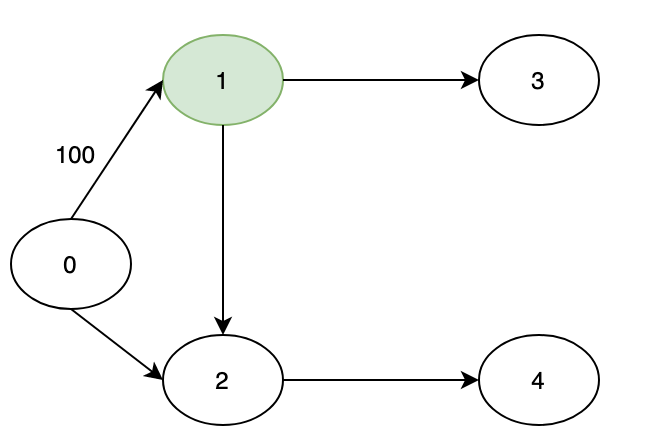

In [ ]:
# Test Network 4
# Multiple destinations, Multiple solutions

nodes = [0,1,2,3,4,5,6,7]
links = [(0,1), (0,3), (0,4), (0,5), (1,6), (2,1), (2,6), (3,2), (4,7), (7,2), (7,6)]

cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
cost[2][6]=100

![image.png]()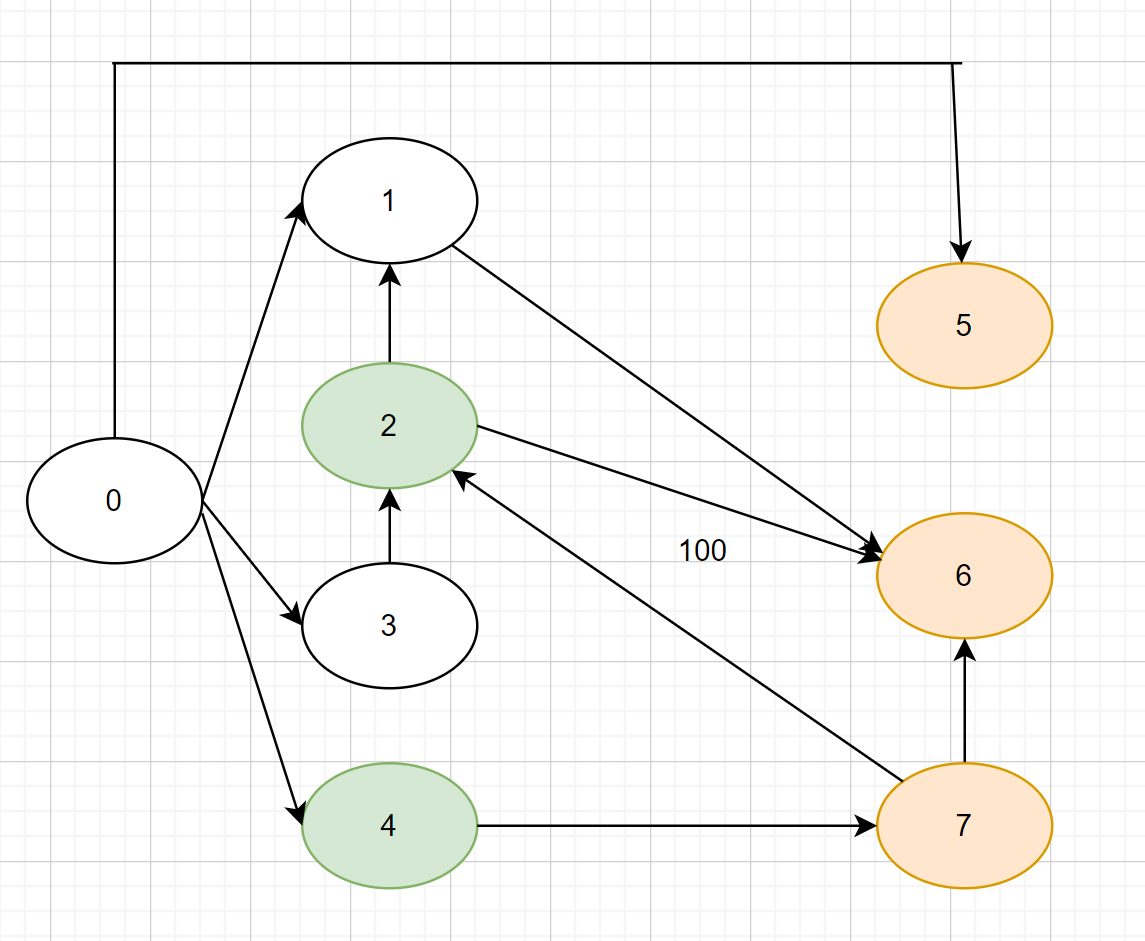

In [ ]:
# Test Network 5

import random
import networkx as nx #improting the package as "nx"

G=nx.gnp_random_graph(30,0.2,directed=True)
DAG = nx.DiGraph([(u,v,{'weight':random.randint(-10,10)}) for (u,v) in G.edges() if u<v])
nx.is_directed_acyclic_graph(DAG)

print(DAG.nodes)
print(DAG.edges)
# generate node positions:
pos = nx.random_layout(DAG)

nodes = list(DAG.nodes)
links = list(DAG.edges)
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
# cost[0][1]=100

Visualisation

In [ ]:
# visualisation of the actual network

import networkx as nx #improting the package as "nx"
import matplotlib.pyplot as plt

g = nx.DiGraph() # Initialize the directed graph
g.add_nodes_from(nodes) # Add nodes to the graph from the list we created
g.add_edges_from(links) # Add links from the list we created
#Check if the nodes and links are added by printing them
print(g.nodes)
print(g.edges)
# generate node positions:
pos = nx.random_layout(g)
# draw graph
plt.figure(3,figsize=(6,6)) 
nx.draw_networkx(g, pos=pos, font_size=16, node_color='blue', font_color='white')
# draw subgraph for highlights
# nx.draw_networkx(g.subgraph(29), pos=pos, font_size=16, node_color='red', font_color='green')

### Single Dest

In [ ]:
# LP trial

from gurobipy import *

N = len(nodes)

m = Model()
t = m.addVars(nodes, vtype = GRB.INTEGER)
x = m.addVars(links, vtype = GRB.BINARY)

forwardStar = forwardStarMaker(links)
backwardStar = backwardStarMaker(links)

# Constraints
origin = 0
dest = 3
nodesToVisit = []

m.addConstr(sum([x[origin, k] for k in forwardStar[origin]]) == 1, name = "exit from origin")  # exit from origin
m.addConstr(sum([x[k, dest] for k in backwardStar[dest]]) == 1, name = "entry to dest") # entry to dest

m.addConstr(t[origin] >= 0.0, name = "t[origin]")

for (i,j) in links:
  # Original constraints
  # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
  # m.addConstr(t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000+1000*(1-x[i,j]), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

  # Original Indicator constraints
  m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
  m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

  # Modified constraints
  # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+x[i,j]*1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")

for n in nodes:
    if n not in [origin, dest]:
      m.addConstr(sum([x[n, k] for k in forwardStar[n]]) == sum([x[k, n] for k in backwardStar[n]]), name = "flow conservation ["+str(i)+", "+str(j)+"]")

      if n in nodesToVisit:
        m.addConstr(sum([x[n, k] for k in forwardStar[n]]) >= 1)
        m.addConstr(sum([x[k, n] for k in backwardStar[n]]) >= 1)

# obj = sum([cost[i][j]*x[i,j] for (i,j) in links])
obj = t[dest]
m.Params.outputFlag = 0
m.setObjective(obj, sense = GRB.MINIMIZE)
m.optimize()

if m.status == GRB.OPTIMAL:
    print('model is optimal ✅✅✅')
    # print('objective value:',obj.getValue())
    print('objective value:',obj.x)
    print('')
    printTvalues(t, x, nodes, links)
elif m.status ==GRB.INFEASIBLE:
    print('model is infeasible ❌❌❌')

    m.computeIIS();
    for c in m.getConstrs():
        if c.IISConstr:
            print('%s' % c.constrName)
elif m.status == GRB.UNBOUNDED:
    print('model is unbounded')
else:
    print('Not sure')

### Multiple Dest Approach 1

In [ ]:
# LP trial

from gurobipy import *

def gurobi_optimiser_multiple_dest_1(d):

  N = len(nodes)

  m = Model()
  t = m.addVars(nodes, vtype = GRB.INTEGER)
  x = m.addVars(links, vtype = GRB.BINARY)

  forwardStar = forwardStarMaker(links)
  backwardStar = backwardStarMaker(links)

  # Constraints
  origin = 0
  dest = d
  nodesToVisit = [1]

  m.addConstr(sum([x[origin, k] for k in forwardStar[origin]]) == 1, name = "exit from origin")  # exit from origin
  m.addConstr(sum([x[k, dest] for k in backwardStar[dest]]) == 1, name = "entry to dest") # entry to dest

  m.addConstr(t[origin] >= 0.0, name = "t[origin]")

  for (i,j) in links:
    # Original constraints
    # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
    # m.addConstr(t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000+1000*(1-x[i,j]), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

    # Original Indicator constraints
    m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
    m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

    # Modified constraints
    # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+x[i,j]*1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")

  for n in nodes:
      if n not in [origin, dest]:
        m.addConstr(sum([x[n, k] for k in forwardStar[n]]) == sum([x[k, n] for k in backwardStar[n]]), name = "flow conservation ["+str(i)+", "+str(j)+"]")

        if n in nodesToVisit:
          m.addConstr(sum([x[n, k] for k in forwardStar[n]]) >= 1)
          # m.addConstr(sum([x[k, n] for k in backwardStar[n]]) >= 1)

  # obj = sum([cost[i][j]*x[i,j] for (i,j) in links])
  obj = t[dest]
  m.Params.outputFlag = 0
  m.setObjective(obj, sense = GRB.MINIMIZE)
  m.optimize()

  if m.status == GRB.OPTIMAL:
      print('model is optimal ✅✅✅ for dest:',dest)
      # print('objective value:',obj.getValue())
      print('objective value:',obj.x)
      print('')
      printTvalues(t, x, nodes, links)
  elif m.status ==GRB.INFEASIBLE:
      print('model is infeasible ❌❌❌')

      m.computeIIS();
      for c in m.getConstrs():
          if c.IISConstr:
              print('%s' % c.constrName)
  elif m.status == GRB.UNBOUNDED:
      print('model is unbounded')
  else:
      print('Not sure')

dests = [3,4]
# dests = [5,81,105]
for d in dests:
  gurobi_optimiser_multiple_dest_1(d)

### Multiple Dest Approach 2

In [32]:
print(backwardStarMaker(links))

{1: [0, 5222, 5223], 2146: [0, 2145, 5219], 2147: [0, 2146, 5219], 3886: [0, 123, 2142, 2143, 3885, 5219], 2: [1, 5222, 5223], 2150: [1, 2, 2149, 5222, 5223], 2151: [1, 2, 2150, 5222, 5223], 4272: [1, 2, 121, 122, 2138, 2139, 3882, 3883, 4271, 5222, 5223], 4273: [1, 2, 121, 122, 2138, 2139, 3882, 3883, 4272, 5222, 5223], 3: [2, 5224, 5225], 4: [3, 5224, 5225], 2152: [3, 4, 2151, 5224, 5225], 2153: [3, 4, 2152, 5224, 5225], 4270: [3, 4, 119, 120, 2136, 2137, 3880, 3881, 4269, 5224, 5225], 4271: [3, 4, 119, 120, 2136, 2137, 3880, 3881, 4270, 5224, 5225], 5: [4, 5226, 5227], 6: [5, 5226, 5227], 2154: [5, 6, 2153, 5226, 5227], 2155: [5, 6, 2154, 5226, 5227], 7: [6, 5228, 5229], 8: [7, 5228, 5229], 1933: [7, 8, 1991, 5228, 5229], 1991: [7, 8, 1933, 5228, 5229], 9: [8, 5232, 5233], 10: [9, 5232, 5233], 11: [10], 12: [11], 111: [11, 12, 110, 2126, 2127, 2162, 2163, 2648, 2649, 3386, 3387, 3448, 3449, 4280, 4281, 5234, 5235], 112: [11, 12, 111, 2126, 2127, 2162, 2163, 2648, 2649, 3386, 3387, 3

In [38]:
# LP trial

def gurobi_optimiser_multiple_dest_2(dests):

  N = len(nodes)

  m = gp.Model(env=env) # Use this for Gurobi Academic License
  t = m.addVars(nodes, vtype = GRB.INTEGER)
  x = m.addVars(links, vtype = GRB.BINARY)

  forwardStar = forwardStarMaker(links)
  backwardStar = backwardStarMaker(links)

  # Constraints
  origin = 1
  nodesToVisit = []

  m.addConstr(sum([x[origin, j] for j in forwardStar[origin]]) == 1, name = "exit from origin")  # exit from origin

  for (i,j) in links:

    # Original Indicator constraints
    m.addConstr((x[i,j] == 1) >> (t[j]-t[i]>=cost[i][j]+1), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
    m.addConstr((x[i,j] == 1) >> (t[j]-t[i]<=cost[i][j]+1000), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

  for i in nodes:
      if i not in dests and i!=origin:
        m.addConstr(sum([x[i, j] for j in forwardStar[i]]) == sum([x[j, i] for j in backwardStar[i]]), name = "flow conservation ["+str(i)+", "+str(j)+"]")

        if i in nodesToVisit:
          m.addConstr(sum([x[j, i] for j in backwardStar[i]]) >= 1, name = "nodesToVisit "+str(j)+","+str(i))

  m.addConstr(sum(sum([x[j, i] for j in backwardStar[i]]) for i in dests) >= 1, name="multiple dests, "+str(i))

  obj = sum([cost[i][j]*x[i,j] for (i,j) in links])
  # obj = t[dests[0]]
  # obj = sum([t[j] for j in nodes])
  # obj = sum([t[j]*x[i,j] for (i,j) in links])
  # obj = sum([t[j]*cost[i][j]*x[i,j] for (i,j) in links])
  m.Params.outputFlag = 0
  m.setObjective(obj, sense = GRB.MINIMIZE)
  m.optimize()

  if m.status == GRB.OPTIMAL:
      print('model is optimal ✅✅✅')
      print('objective value:',obj.getValue())
      # print('objective value:',obj.x)
      print('')
      # for (a,b) in links:
      #   if b in nodesToVisit:
      #     print(a,b, x[a,b].x)
      #   if a in nodesToVisit:
      #     print(a,b, x[a,b].x)
      printTvalues(t, x, nodes, links)
  elif m.status ==GRB.INFEASIBLE:
      print('model is infeasible ❌❌❌')
      m.computeIIS();
      for c in m.getConstrs():
          if c.IISConstr:
              print('%s' % c.constrName)
  elif m.status == GRB.UNBOUNDED:
      print('model is unbounded')
  else:
      print('Not sure')

# dests = [3,4] # TC 3
dests = [105] # TC Actual
# dests = [5,6,7] # TC 4
# dests = [28] # TC 5.0
# dests = random.sample(nodes, 2) # TC 5.1
dests = [124, 135, 136, 147, 163, 164, 279, 280, 298, 333, 405, 406, 499, 500, 661, 662, 727, 728, 877, 878, 911, 912, 972, 1019, 1020, 1091, 1092, 1251, 1292, 1597, 1642, 1726, 1727, 1813, 1840, 1841, 1932, 1952, 1953, 2010, 2011, 2088, 2089, 2109, 2182, 2183, 2228, 2229, 2292, 2324, 2325, 2357, 2480, 2494, 2495, 2618, 2619, 2777, 2866, 2867, 3188, 3189, 3370, 4394, 4395, 4414, 4415, 4593, 4634, 4635, 4758, 4812, 4813, 4906, 4907, 5020, 5021, 5116, 5117, 5198, 5199, 5384, 5385]
gurobi_optimiser_multiple_dest_2(dests)

model is optimal ✅✅✅
objective value: 22.0

Flow on link  (1, 2)  is: 1.0
Flow on link  (2, 3)  is: 1.0
Flow on link  (3, 4)  is: 1.0
Flow on link  (4, 5)  is: 1.0
Flow on link  (5, 6)  is: 1.0
Flow on link  (6, 7)  is: 1.0
Flow on link  (7, 1991)  is: 1.0
Flow on link  (1991, 1992)  is: 1.0
Flow on link  (1992, 2161)  is: 1.0
Flow on link  (2161, 2162)  is: 1.0
Flow on link  (2162, 4281)  is: 1.0
Flow on link  (4281, 4282)  is: 1.0
Flow on link  (4282, 4283)  is: 1.0
Flow on link  (4283, 4284)  is: 1.0
Flow on link  (4284, 4285)  is: 1.0
Flow on link  (4285, 4286)  is: 1.0
Flow on link  (4286, 4287)  is: 1.0
Flow on link  (4287, 4288)  is: 1.0
Flow on link  (4288, 4289)  is: 1.0
Flow on link  (4289, 4290)  is: 1.0
Flow on link  (4290, 4811)  is: 1.0
Flow on link  (4811, 4812)  is: 1.0
***********Printing T Values**************
T for 1 : -0.0
T for 2 : 2.0
T for 3 : 4.0
T for 4 : 6.0
T for 5 : 8.0
T for 6 : 10.0
T for 7 : 12.0
T for 1991 : 14.0
T for 1992 : 16.0
T for 2161 : 18.0
T for